In [ ]:
import numpy as np
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib.image  as pltimg
from matplotlib import animation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading the datasets

In [ ]:
import kagglehub

# Download latest version
mnist_path = kagglehub.dataset_download("scolianni/mnistasjpg")
coil_path = kagglehub.dataset_download("cyx6666/coil20")

In [ ]:
datagen  =  ImageDataGenerator()

In [ ]:
mnist_data = datagen.flow_from_directory(
    mnist_path,
    shuffle=False
)

coil_data = datagen.flow_from_directory(
    coil_path,
    shuffle=False
)

In [ ]:
mnist_images, mnist_labels = next(mnist_data)
coil_images, coil_labels = next(coil_data)

In [ ]:
def plot_images(images, labels, class_names, dataset_name, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype('uint8'))
        class_idx = np.argmax(labels[i])
        class_name = class_names[class_idx]
        plt.title(f"{dataset_name}: {class_name}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

mnist_class_names = list(mnist_data.class_indices.keys())
coil_class_names = list(coil_data.class_indices.keys())

plot_images(mnist_images, mnist_labels, mnist_class_names, "MNIST")
plot_images(coil_images, coil_labels, coil_class_names, "COIL")

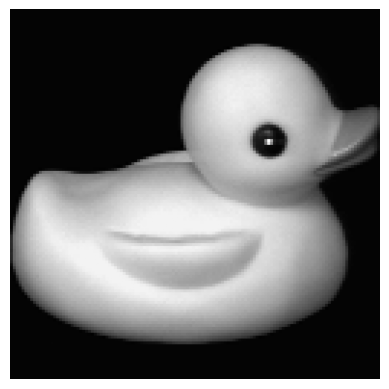

In [36]:
fig, ax = plt.subplots()

coil_images = coil_images/255
img = ax.imshow(coil_images[0].astype('uint8'))
ax.axis('off')  

def update(frame):
    img.set_data(coil_images[frame])  
    return img,

ani = animation.FuncAnimation(
    fig,  
    update,  
    frames=len(coil_images), 
    interval=200,  
    blit=True, 
    repeat=True  
)

from IPython.display import HTML
HTML(ani.to_jshtml())